[< __INTRO MODULE 4__](../Introduction.ipynb)

---

## Introduction

We can say that that's what REST was invented for. Thanks to it, very different programs written in very different technologies can utilize shared data through one, __universal interface__.

The interface itself enables the __user to perform a basic set of operations__ – they are elementary, but complex enough to build complex services. A set of four operations hides beneath the following mysterious acronym `CRUD`.

`CRUD` stands for:
- __C__: Create (POST)
- __R__: Read (GET)
- __U__: Update (PUT)
- __D__: Delete (DELETE)

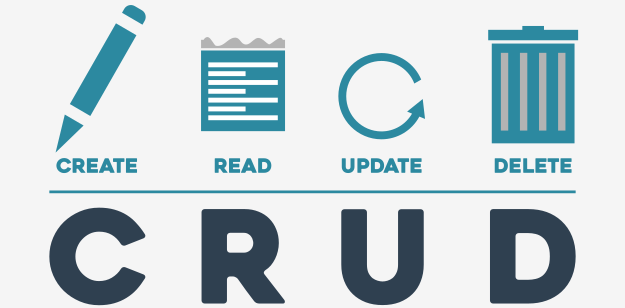

---

## Keep Alive

By default a server implementing HTTP version 1.1 will work as following:

1. __Waits__ for the client's connection
2. __Reads__ the client's requests
3. __Sends__ a response
4. __Keeps__ the connection __alive__ for the next requests from the same client
5. __Silently closes__ the connection if the client doesn't request anything more

This flow of process can be seen in the header of the server, in concrete, in the __Connection__ property. For the indicated flow the server will set its connection property to `keep-alive`.

> __NOTE__: If the connection value is close it will mean that the server will close the connection as soon the response is fully transmitted (default behavior in HTTP 1.0).

The connection we want to settle can be stated by the own client in the request, in concrete, in the calling of the methods `get`, `post`, `put` or `delete`.

For example:
```python

    import requests

    header = {'Connection': 'Close'}
    response = requests.get('http://127.0.0.1:3000', header=header)

```

This change will make that the server closes its connection when the response has ended (and also will return that state in it's header).

---

## Getting more technical

Now we are going to perform an exercise where we are going to implement CRUD against the json-server that we have set up locally from the previous exercise.

This exercise will have the following assumptions:
- We'll make use of the [previously presented json-server](./4-Request.ipynb).
- We'll use the following [cars_crud.json](./cars_crud.json) as our initial database.
- Each register from cards_crud.json has the following structure
    - `id`: A mandatory unique integer
    - `brand`: String
    - `model`: String
    - `production_year`: An integer
    - `convertible`: A boolean

We will keep a copy of the original cars_crud.json file ([cars_crud_ORIGINAL.json](./cars_crud_ORIGINAL.json)), so that in case the json server makes an unexpected modification we can always restore the file.

We start by initialising the server using the command `json-server --watch ./cars_crud.json`.

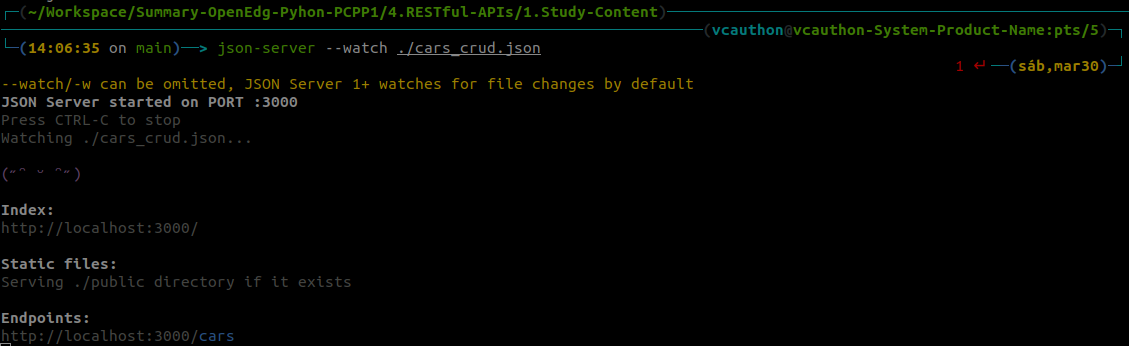

> Note that json-server organises the JSON's it contains through its own name, so if we want to access the data in the file we have just published, we will have to indicate it in the server link itself, i.e. __http://127.0.0.1:3000/cars__.

The following exercises will be done in this sections of the documentation:
- [Create](#creating-the-crud-solution-create)
- [Read](#creating-the-crud-solution-read)
- [Update](#creating-the-crud-solution-update)
- [Delete](#creating-the-crud-solution-delete)

---

### Creating the CRUD solution (Read)

As we will remember, the R of CRUD defines the reading capacity of the solution, therefore, and to start building our solution, we will generate the necessary code to be able to read the cars_crud.json file that our json-server is publishing.

In [11]:
import requests

base_url = 'http://127.0.0.1:3000/cars'

# Making the request
try:
    response = requests.get(base_url)
# Handling however error may occur
except requests.RequestException as err:
    print(f"Communication Error:\n{err}")
# Checking that the server has returned the expecter response
else:
    if response.status_code == requests.codes.ok:
        print(response.text)
    else:
        print(f"Unexpected server response {response.status_code}")    

[
  {
    "id": "1",
    "brand": "Ford",
    "model": "Mustang",
    "production_year": 1972,
    "convertible": true
  },
  {
    "id": "2",
    "brand": "Chevrolet",
    "model": "Camaro",
    "production_year": 1988,
    "convertible": true
  },
  {
    "id": "3",
    "brand": "Aston Martin",
    "model": "Rapide",
    "production_year": 2010,
    "convertible": false
  },
  {
    "id": "4",
    "brand": "Maserati",
    "model": "Mexico",
    "production_year": 1970,
    "convertible": false
  },
  {
    "id": "5",
    "brand": "Nissan",
    "model": "Fairlady",
    "production_year": 1974,
    "convertible": false
  },
  {
    "id": "6",
    "brand": "Mercedes Benz",
    "model": "300SL",
    "production_year": 1967,
    "convertible": true
  },
  {
    "id": "7",
    "brand": "Porsche",
    "model": "911",
    "production_year": 1963,
    "convertible": false
  }
]


Furthermore, as we may recall in the previous sections, it was [mentioned](./4-Request.ipynb) that request segments the response received between HEADER and CONTENT. That HEADER contains the header of the message sent by the server and CONTENT is the requested content itself.

On this HEADER we can know the type of data received (which we already know is a JSON), therefore, we could implement the following solution to make the content received by our CRUD more readable.

In [5]:
import requests

# Making the request
try:
    response = requests.get(base_url)
# Handling however error may occur
except requests.RequestException as err:
    print(f"Communication Error:\n{err}")
# Checking that the server has returned the expecter response
else:
    if response.status_code == requests.codes.ok:
        if response.headers["Content-Type"] == "application/json":
            print(response.json())
        else:
            print(response.text)
    else:
        print(f"Unexpected server response {response.status_code}")    

NameError: name 'base_url' is not defined

To give a better layer of presentation to the data we are going to include the following formatting changes to make the data presented when read more palatable (as reading JSON may not be everyone's cup of tea).

In [4]:
from os import path

key_names = ["id", "brand", "model", "production_year", "convertible"]
key_widths = [10, 15, 10, 20, 15]

def show_head():
    for (n, w) in zip(key_names, key_widths):
        print(n.ljust(w), end='| ')
    print()


def show_empty():
    for w in key_widths:
        print(' '.ljust(w), end='| ')
    print()


def show_car(car):
    for (n, w) in zip(key_names, key_widths):
        print(str(car[n]).ljust(w), end='| ')
    print()


def show(json):
    show_head()
    if isinstance(json, list):
        for car in json:
            show_car(car)
    elif isinstance(json, dict):
        if json:
            show_car(json)
        else:
            show_empty()

try:
    response = requests.get(path.join(base_url, "2"))
except requests.RequestException:
    print('Communication error')
else:
    if response.status_code == requests.codes.ok:
        if response.headers["Content-Type"] == "application/json":
            show(response.json())
        else:
            print(response.text)
    else:
        print(f"Unexpected server response {response.status_code}")    

NameError: name 'requests' is not defined

Additionally, json-server is prepared to be able to send the data in the order requested by the client, i.e. we can ask it to show us the cars in a specific order, for example, in the case shown below, we will request that the data is shown in the order of the year of production.

This can me done making passing as arguments the sorting you want to apply:
- __QUERY__: `http://127.0.0.1:3000/cars?_sort=production_year`
    - URI: `http://127.0.0.1:3000/cars`
    - Starting of arguments: `?`
    - Concrete arguments: `_sort=production_year`
        - `_sort`: The content will be sort by that column
        - `_order`: The sorted content will be ordered in `asc` (_ascending_) or `desc` (_descending_)

> __NOTE__: All additional arguments has to be concatenated by an ampersand (`&`).

In [16]:
try:
    response = requests.get(f"{base_url}?_sort=production_year")
except requests.RequestException:
    print('Communication error')
else:
    if response.status_code == requests.codes.ok:
        if response.headers["Content-Type"] == "application/json":
            show(response.json())
        else:
            print(response.text)
    else:
        print(f"Unexpected server response {response.status_code}")    

id        | brand          | model     | production_year     | convertible    | 
7         | Porsche        | 911       | 1963                | False          | 
6         | Mercedes Benz  | 300SL     | 1967                | True           | 
4         | Maserati       | Mexico    | 1970                | False          | 
1         | Ford           | Mustang   | 1972                | True           | 
5         | Nissan         | Fairlady  | 1974                | False          | 
2         | Chevrolet      | Camaro    | 1988                | True           | 
3         | Aston Martin   | Rapide    | 2010                | False          | 


### Creating the CRUD solution (Delete)

When using request the solution to delete records will not that complex because the have or beloved delete method.

Let's create the solution:

In [22]:

headers = {'Connection': 'Close'}

def show_results_bd(query: str = None, parameters: str = None):
    url = base_url
    if query:
        url = path.join(url, query)
    if parameters:
        url = f"{url}?{parameters}"
    response = requests.get(url)
    if response.status_code != requests.codes.ok:
        raise Exception('The server hasn\'t returned the requested data')

    show(response.json())

try:
    print("*".center(100, "*"))
    print('1. BD without deleting anything')
    show_results_bd()
    print("*".center(100, "*"))
    response = requests.delete(path.join(base_url, "1"), headers=headers)
    if response.status_code == requests.codes.ok:
        print('2. Deletion done correctly')
        print("*".center(100, "*"))
        print('3. Showing the current state of the BD')
        show_results_bd()
        print("*".center(100, "*"))
    else:
        raise Exception("The server hasn't returned the expected response")
except Exception as err:
    raise err

****************************************************************************************************
1. BD without deleting anything
id        | brand          | model     | production_year     | convertible    | 
1         | Ford           | Mustang   | 1972                | True           | 
2         | Chevrolet      | Camaro    | 1988                | True           | 
3         | Aston Martin   | Rapide    | 2010                | False          | 
4         | Maserati       | Mexico    | 1970                | False          | 
5         | Nissan         | Fairlady  | 1974                | False          | 
6         | Mercedes Benz  | 300SL     | 1967                | True           | 
7         | Porsche        | 911       | 1963                | False          | 
****************************************************************************************************
2. Deletion done correctly
*******************************************************************************************

### Creating the CRUD solution (Create)

For the create functionality, we will have to generate a process that is able to send a JSON to the server in the same format that the server expects, i.e. send a JSON with the same fields that the cars have.

However, and additionally, we will have to indicate, in the header of the request, how the server should treat the data we are about to send. More or less the server will do the same as we do when we receive its responses. We check the `Content-Type` property of the header to know how we should transform the received data.

In [33]:
from typing import List
from dataclasses import dataclass, asdict
from json import dumps

@dataclass
class Car:
    id: int
    brand: str
    model: str
    production_year: int
    convertible: bool

header_convertible = {'Content-type': 'application/json'}

# Creating the cars that will be added to the server
cars: List[Car] = []
cars.append(Car(id=8, brand="Toyota", model="Camry", production_year=2020, convertible=False))
cars.append(Car(id=9, brand="Ford", model="Mustang", production_year=2018, convertible=True))
cars.append(Car(id=10, brand="BMW", model="3 Series", production_year=2022, convertible=False))


print(" BD WITHOUT ADDING ANYTHING ".center(100, "*"))
show_results_bd()
print("*".center(100, "*"))

print(" ADDING NEW CARS INTO THE BD ".center(100, "*"))
for index, car in enumerate(cars):
    response = requests.post(base_url, headers=header_convertible, data=dumps(asdict(car)))
    if response.status_code == requests.codes.created:
        print(f"{index}.The car {car.brand} has been correctly added")
print("*".center(100, "*"))

print(" BD WITH ALL THE NEW CONTENT ADDED ".center(100, "*"))
show_results_bd()
print("*".center(100, "*"))

    

************************************ BD WITHOUT ADDING ANYTHING ************************************
id        | brand          | model     | production_year     | convertible    | 
2         | Chevrolet      | Camaro    | 1988                | True           | 
3         | Aston Martin   | Rapide    | 2010                | False          | 
4         | Maserati       | Mexico    | 1970                | False          | 
5         | Nissan         | Fairlady  | 1974                | False          | 
6         | Mercedes Benz  | 300SL     | 1967                | True           | 
7         | Porsche        | 911       | 1963                | False          | 
****************************************************************************************************
*********************************** ADDING NEW CARS INTO THE BD ************************************
0.The car Toyota has been correctly added
1.The car Ford has been correctly added
2.The car BMW has been correctly added
*********


---

### Creating the CRUD solution (Update)

To modify an existing record all we need to know is which record we want to modify. This is where the use of the unique identifier comes in, i.e. the first field that each car has and the `put` method to tell the server that this field will be modified.

In [15]:
edited_car = Car(6, 'Mercedes Benz', '400SL', '1967', True)

print(" BD WITHOUT EDITING ANYTHING ".center(100, "*"))
show_results_bd("6")
print("*".center(100, "*"))

print(" EDITING A CONCRETE CAR FROM THE BD ".center(100, "*"))
response = requests.put(path.join(base_url, "6"), headers=header_convertible, data=dumps(asdict(edited_car)))
if response.status_code == requests.codes.ok:
    print(f"Car {edited_car.brand} (with id {edited_car.id}) edited correctly")
print("*".center(100, "*"))

print(" BD WITH ALL THE NEW CONTENT ADDED ".center(100, "*"))
show_results_bd("6")
print("*".center(100, "*"))


*********************************** BD WITHOUT EDITING ANYTHING ************************************
id        | brand          | model     | production_year     | convertible    | 
6         | Mercedes Benz  | 300SL     | 1967                | True           | 
****************************************************************************************************
******************************** EDITING A CONCRETE CAR FROM THE BD ********************************
Car Mercedes Benz (with id 6) edited correctly
****************************************************************************************************
******************************** BD WITH ALL THE NEW CONTENT ADDED *********************************
id        | brand          | model     | production_year     | convertible    | 
6         | Mercedes Benz  | 400SL     | 1967                | True           | 
****************************************************************************************************



---

[< __INTRO MODULE 4__](../Introduction.ipynb)